In [1]:
from selenium import webdriver
import pandas as pd

In [2]:
driver = webdriver.Chrome()

In [3]:
def get_data(url):
    driver.get(url)
    
    array = []
    
    for i in range(5):
        new_url = url[0:57] + str(i+1) + url[58:]
        driver.get(new_url)
        elements = driver.find_elements_by_xpath("//span[@class='desnopolje']")
        
        for element in elements:
            if element.text[0] == 'D' or element.text[0] == 'B' or element.text[0] == 'P':
                array.append(element.text)
            i+=1
    return pd.Series(array)

### Get all cars from Hadzici

In [4]:
hadzici = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=3817")

### Get all cars from Ilidza

In [5]:
ilidza = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=3879")

### Get all cars from Ilijas

In [6]:
ilijas = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=3892")

### Get all cars from Sarajevo - Centar

In [7]:
sarajevo_centar = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=3812")

### Get all cars from Sarajevo - Novi Grad

In [8]:
sarajevo_novi_grad = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=3969")

### Get all cars from Sarajevo - Novo Sarajevo


In [9]:
novo_sarajevo = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=5896")

### Get all cars from Sarajevo - Stari Grad


In [10]:
stari_grad = get_data("https://www.olx.ba/pretraga?id=18&kategorija=18&stranica=1&stanje=0&vrstapregleda=tabela&sort_order=desc&kanton=9&grad%5B%5D=4048")

In [11]:
dataset = pd.DataFrame({
    "Hadzici":hadzici, 
    "Ilidza":ilidza, 
    "Ilijas":ilijas, 
    "Sarajevo - Centar": sarajevo_centar,
    "Sarajevo - Novi Grad": sarajevo_novi_grad, 
    "Sarajevo - Novo Sarajevo": novo_sarajevo,
    "Sarajevo - Stari Grad": stari_grad
})

In [12]:
dataset.to_csv("data.csv", index = False)

In [13]:
dataset.head()

,Hadzici,Ilidza,Ilijas,Sarajevo - Centar,Sarajevo - Novi Grad,Sarajevo - Novo Sarajevo,Sarajevo - Stari Grad
0,Dizel,Dizel,Dizel,Benzin,Benzin,Benzin,Dizel
1,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel
2,Dizel,Dizel,Benzin,Dizel,Benzin,Dizel,Plin
3,Dizel,Dizel,Dizel,Dizel,Benzin,Dizel,Dizel
4,Dizel,Dizel,Benzin,Dizel,Dizel,Dizel,Dizel


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
Hadzici                     149 non-null object
Ilidza                      150 non-null object
Ilijas                      150 non-null object
Sarajevo - Centar           149 non-null object
Sarajevo - Novi Grad        150 non-null object
Sarajevo - Novo Sarajevo    150 non-null object
Sarajevo - Stari Grad       146 non-null object
dtypes: object(7)
memory usage: 8.3+ KB


In [15]:
dataset.dropna(inplace = True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 7 columns):
Hadzici                     146 non-null object
Ilidza                      146 non-null object
Ilijas                      146 non-null object
Sarajevo - Centar           146 non-null object
Sarajevo - Novi Grad        146 non-null object
Sarajevo - Novo Sarajevo    146 non-null object
Sarajevo - Stari Grad       146 non-null object
dtypes: object(7)
memory usage: 9.1+ KB


In [17]:
dataset["Sarajevo - Stari Grad"].value_counts()[:]

Dizel     106
Benzin     32
Plin        8
Name: Sarajevo - Stari Grad, dtype: int64

In [18]:
df = pd.DataFrame({
    "Hadzici":dataset["Hadzici"].value_counts()[:], 
    "Ilidza":dataset["Ilidza"].value_counts()[:], 
    "Ilijas":dataset["Ilijas"].value_counts()[:], 
    "Sarajevo - Centar": dataset["Sarajevo - Centar"].value_counts()[:],
    "Sarajevo - Novi Grad": dataset["Sarajevo - Novi Grad"].value_counts()[:], 
    "Sarajevo - Novo Sarajevo": dataset["Sarajevo - Novo Sarajevo"].value_counts()[:],
    "Sarajevo - Stari Grad": dataset["Sarajevo - Stari Grad"].value_counts()[:]
})

In [19]:
df = df.sort_values(by = ["Hadzici"], ascending = False)
df.head()

,Hadzici,Ilidza,Ilijas,Sarajevo - Centar,Sarajevo - Novi Grad,Sarajevo - Novo Sarajevo,Sarajevo - Stari Grad
Dizel,114,130,115,101,127,112,106
Benzin,25,15,25,40,17,29,32
Plin,7,1,6,5,2,5,8


In [22]:
df.index = ["Diesel", "Gasoline", "Gas"]

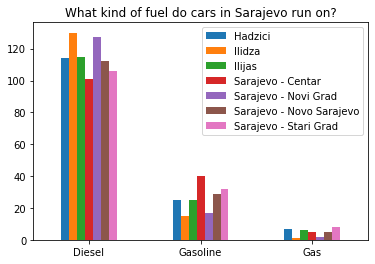

In [24]:
import matplotlib.pyplot as plt


df.plot.bar(rot = 0, title = "What kind of fuel do cars in Sarajevo run on?")
plt.savefig('WhatSarajevoDrives.png')
plt.show()